# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd

from context import *
from util.classifiers import *
from util.dfmgmt import initSet, wrangle
from util.polarize import sentiment
from util.plots import boxplotify, pairplotify

## Plot characteristics and global variables

In [2]:
%matplotlib inline

## Import dataset

In [3]:
df = initSet()

In [4]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9744,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9791,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,-0.2263,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


## Basic Exploratory Analysis

In [5]:
# Basic descriptions of the distribution of the data
df.describe()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1991.199795,1986.552254,61.288166,137.016137,93.791496,292.182889,65.571209,64.231301,21.847336,105.648822,15.445184,0.175461,1.178023,4.874880,0.447342,0.580943
std,13.556839,13.559383,35.331564,80.208321,45.511645,168.326983,44.005934,42.659356,17.708684,56.066287,13.698001,0.380410,4.894722,3.527072,0.751239,0.493468
min,1961.000000,1960.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-3.427959,-0.999700,0.000000
25%,1981.000000,1980.000000,40.000000,84.000000,67.000000,181.000000,36.000000,34.000000,11.000000,72.000000,7.000000,0.000000,0.000000,2.975612,-0.025800,0.000000
50%,1994.000000,1990.000000,53.000000,118.000000,85.000000,256.000000,54.000000,57.000000,17.000000,93.000000,12.000000,0.000000,0.000000,4.161161,0.926000,1.000000
75%,2003.000000,2000.000000,70.000000,165.000000,108.000000,355.000000,81.000000,84.000000,28.000000,121.000000,19.000000,0.000000,0.000000,5.747534,0.988125,1.000000
max,2010.000000,2010.000000,307.000000,638.000000,388.000000,1415.000000,376.000000,346.000000,205.000000,481.000000,234.000000,1.000000,88.000000,84.237399,0.999900,1.000000


In [6]:
# # # Get pair plot for major features of the dataset
# pairplotify(
#     df[
#         ['year',
#          'density',
#          'unique_words',
#          'total_curses', 
#          'sentiment']
#     ]
# )

In [7]:
# Drop both year and decade
dropList = ['most_used_term']
removeList = ['decade', 'year', 'charted']

df, features = wrangle(df, dropList, removeList, True)

df['sentiment_polarity'] = df.apply(sentiment, axis=1)  # classify sentiment score
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted,sentiment_polarity
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0,1
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1,1
5,1961,1960,50,105,79,181,39,40,24,80,13,0,0,3.135470,0.9744,1,1
6,1961,1960,39,75,70,160,28,35,21,81,13,0,0,3.503750,0.9978,1,1
7,1961,1960,50,94,78,190,62,17,8,83,6,0,0,3.074737,-0.9791,1,-1
8,1961,1960,53,63,92,166,25,41,18,105,4,0,0,4.993855,-0.2263,1,-1
9,1961,1960,48,57,79,124,29,24,7,83,5,0,0,4.648387,-0.3400,1,-1


In [8]:
# Plot features against time
features = [
    'density', 'unique_words', 'most_used_freq', 'verbs', 'nouns', 'adjectives', 'sentiment'
]

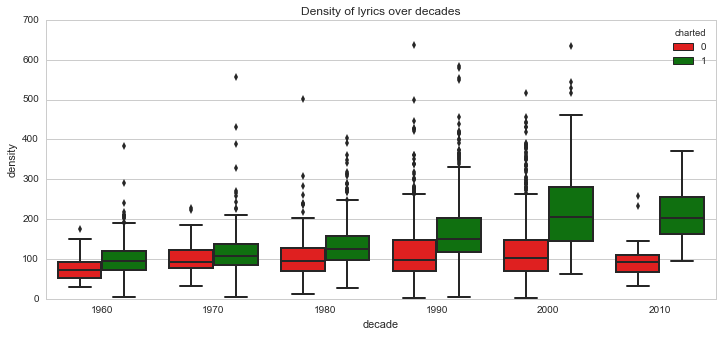

In [9]:
boxplotify(
    df, feature='density', path='densityXtime', title="Density of lyrics over decades"
)

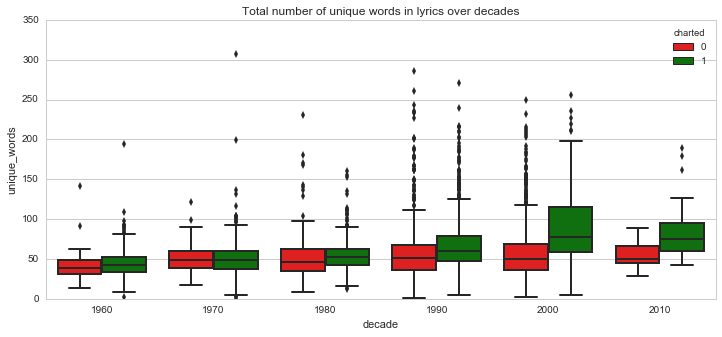

In [10]:
boxplotify(
    df, feature='unique_words', path='unique_wordsXtime', 
    title="Total number of unique words in lyrics over decades"
)

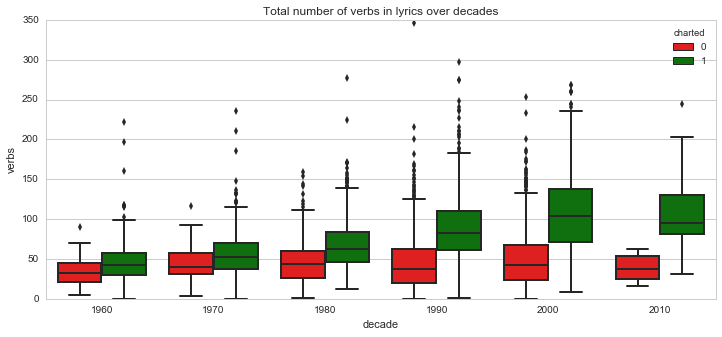

In [11]:
boxplotify(
    df, feature='verbs', path='verbsXtime', 
    title="Total number of verbs in lyrics over decades"
)

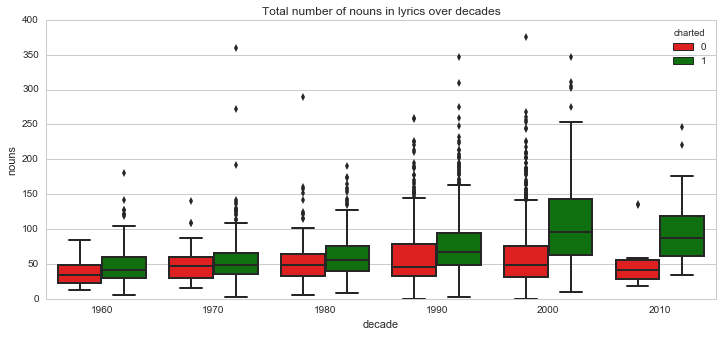

In [12]:
boxplotify(
    df, feature='nouns', path='nounsXtime', 
    title="Total number of nouns in lyrics over decades"
)

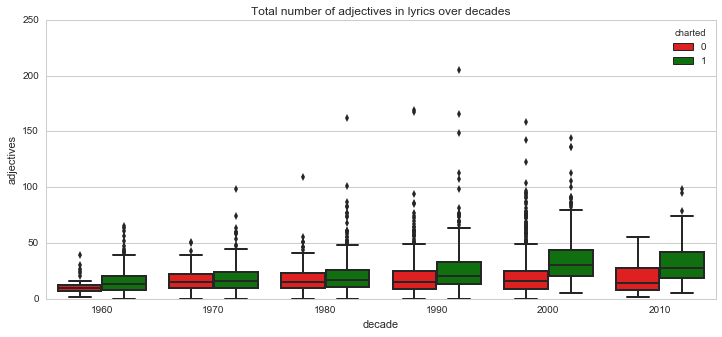

In [13]:
boxplotify(
    df, feature='adjectives', path='adjectivesXtime', 
    title="Total number of adjectives in lyrics over decades")

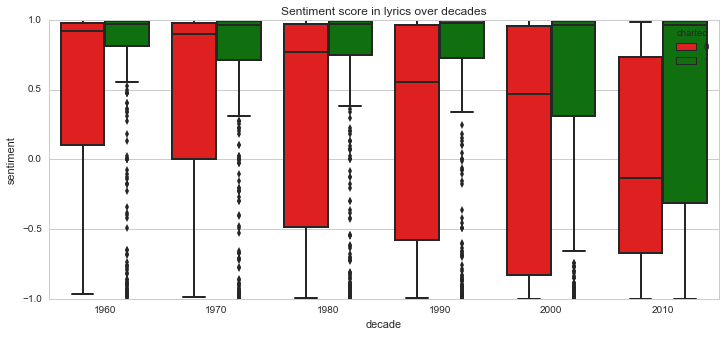

In [14]:
boxplotify(
    df, feature='sentiment', path='sentimentXtime', 
    title="Sentiment score in lyrics over decades",
    save=False
)

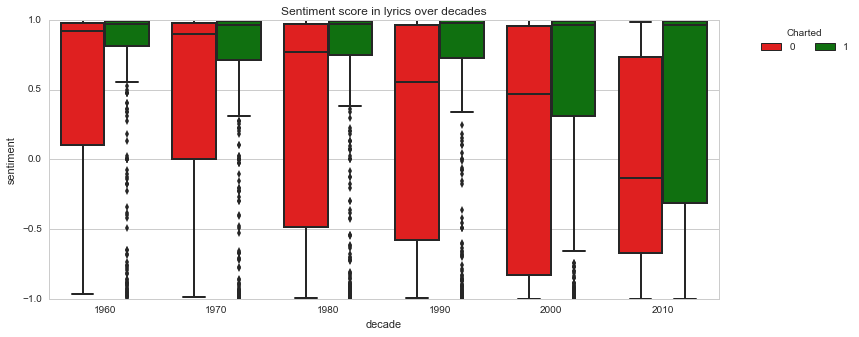

In [36]:
from seaborn import boxplot
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_title("Sentiment score in lyrics over decades")

boxplot(
    x=df['decade'], y=df['sentiment'],
    hue=df['charted'],
    linewidth=2, ax=ax, palette={0: 'r', 1: 'g'}
)

# if save:
#     fig.savefig(staticDir.format(file=path))
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
           ncol=2, shadow=True, title="Charted")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


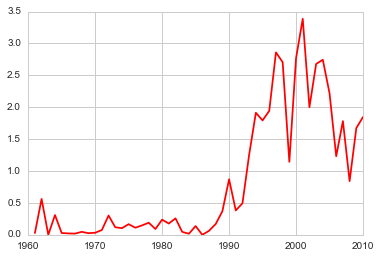

In [15]:
# Quick time series of the unnormalized reading score data points

year = set(df['year'])

# Plot the mean of the reading scores
x, y = zip(
    *sorted(
        (
            xVal, np.mean(
                [
                    yVal for av, yVal in zip(
                        df['year'], df['total_curses']
                    ) if xVal==av
                ]
            )
        ) for xVal in year
    )
)

plt.plot(x, y, 'r-')